In [1]:
# import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# read the dataset

data = pd.read_csv('/home/nhjoy/Documents/Github/ANN-Function-Approx/dataset/train.csv')
data_test = pd.read_csv('/home/nhjoy/Documents/Github/ANN-Function-Approx/dataset/test.csv')

In [7]:
data.head() # check the first 5 rows

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# data split into train, and validation

data = np.array(data) # convert to numpy array
m, n = data.shape # m = number of rows, n = number of columns
np.random.shuffle(data) # shuffle the data

data_dev = data[0:1000].T # validation set
Y_dev = data_dev[0]  # validation set labels
X_dev = data_dev[1:n] # validation set features
X_dev = X_dev / 255. # normalize the data

data_train = data[1000:m].T  # training set
Y_train = data_train[0]  # training set labels
X_train = data_train[1:n]   # training set features
X_train = X_train / 255.  # normalize the data
_,m_train = X_train.shape  # m_train = number of training examples

In [13]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [15]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [16]:
# train the model

W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[0 0 1 ... 0 8 8] [7 5 7 ... 5 0 3]
0.06504878048780488
Iteration:  10
[6 0 7 ... 0 3 8] [7 5 7 ... 5 0 3]
0.1891219512195122
Iteration:  20
[7 0 7 ... 0 3 3] [7 5 7 ... 5 0 3]
0.3072439024390244
Iteration:  30
[7 5 7 ... 0 3 3] [7 5 7 ... 5 0 3]
0.40656097560975607
Iteration:  40
[7 5 7 ... 8 3 3] [7 5 7 ... 5 0 3]
0.4865121951219512
Iteration:  50
[7 5 7 ... 8 0 3] [7 5 7 ... 5 0 3]
0.5376585365853659
Iteration:  60
[7 8 7 ... 8 0 3] [7 5 7 ... 5 0 3]
0.5738292682926829
Iteration:  70
[7 8 7 ... 8 0 3] [7 5 7 ... 5 0 3]
0.6046585365853658
Iteration:  80
[7 8 7 ... 8 0 3] [7 5 7 ... 5 0 3]
0.630609756097561
Iteration:  90
[7 8 7 ... 8 0 3] [7 5 7 ... 5 0 3]
0.6533414634146342
Iteration:  100
[7 8 7 ... 8 0 3] [7 5 7 ... 5 0 3]
0.6713414634146342
Iteration:  110
[7 8 7 ... 8 0 3] [7 5 7 ... 5 0 3]
0.6871951219512196
Iteration:  120
[7 8 7 ... 8 0 3] [7 5 7 ... 5 0 3]
0.7014878048780487
Iteration:  130
[7 8 7 ... 8 0 3] [7 5 7 ... 5 0 3]
0.7145609756097561
Iteration:  140


In [17]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


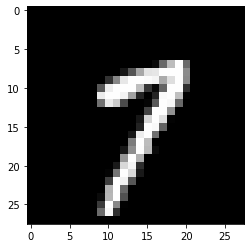

Prediction:  [4]
Label:  5


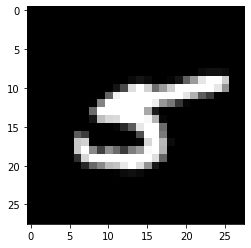

Prediction:  [7]
Label:  7


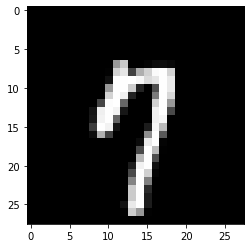

Prediction:  [3]
Label:  3


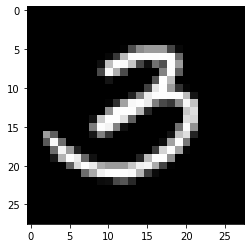

In [18]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)